In [1]:
#Load Requisite Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Read in files
df = pd.read_csv(r'\movie_data_final.csv')
overview_fd = pd.read_csv(r'\movie_overview_fd.csv')
titles_fd = pd.read_csv(r'\movie_title_fd.csv')

genres=['Action', 'Crime', 'War', 'Drama', 'Thriller', 'Mystery', 'Comedy', 'Romance', 'Sci_Fi', 'Animation', 'Documentary', 'Adventure', 'Music', 'Horror', 'Fantasy', 'History', 'Western', 'Rom_Com']

#1. First day on letterboxd
print("\nFirst day on letterboxd:")
print(df.Logged_Date.min())

#2. Total Hours Watched
print("\nTotal Hours Watched:")
print(round(sum(df.runtime)/60))

#3. Average Star Rating
print("\nAverage Star Rating:")
print(round(df.Rating.mean(),2))

#4. Aggregate and sum across the genres to see how many of each I'm watching
print("\nTotal Watched By Genre:")
print(df[genres].aggregate("sum"))

#5. Average movies per week
#Filter out all the dates in July and August 2017 where I was backfilling movies
normal = df[df['Logged_Date']>'2017-08-31']
print("\nAverage movies per week:")
print(round(normal.groupby(['Logged_Year','Logged_Week']).agg({'Name':'size'}).mean(),2))

#6. Average movies per month
print("\nAverage movies per month:")
print(round(normal.groupby(['Logged_Year','Logged_Month']).agg({'Name':'size'}).mean(),2))

#7. Average star ratings per decade
print("\nAverage ratings per decade:")
print(round(df.groupby((df.Year//10)*10).agg({'Rating':'mean'}),2))


First day on letterboxd:
2017-07-29

Total Hours Watched:
3363

Average Star Rating:
2.69

Total Watched By Genre:
Action         364
Crime          242
War             33
Drama          840
Thriller       340
Mystery        136
Comedy         513
Romance        162
Sci_Fi         201
Animation      175
Documentary    116
Adventure      368
Music           97
Horror         120
Fantasy        227
History         67
Western         13
Rom_Com        183
dtype: int64

Average movies per week:
Name    4.3
dtype: float64

Average movies per month:
Name    17.65
dtype: float64

Average ratings per decade:
      Rating
Year        
1920    4.00
1930    3.50
1940    3.46
1950    3.04
1960    2.86
1970    2.92
1980    2.99
1990    2.71
2000    2.58
2010    2.61
2020    2.56


<BarContainer object of 87 artists>

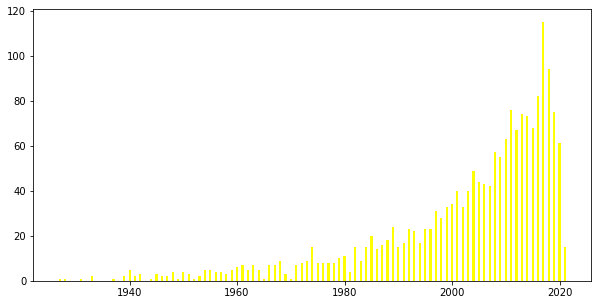

In [2]:
#8 Trended bar graph of release year versus count of films seen  
fig_data = df.groupby(['Year']).agg({'Name':'size'})
x_axis = list(fig_data.index)
y_axis = list(fig_data['Name'])

fig = plt.figure(figsize = (10, 5))

plt.bar(x_axis,y_axis, color ='yellow',
        width = 0.4)

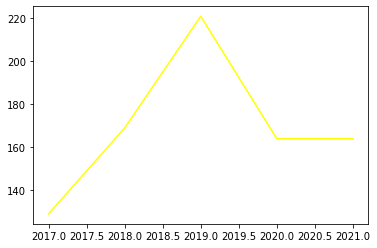

In [3]:
#9 Line graph of new movies logged each year excluding backfilling

fig_data = normal.groupby(['Logged_Year']).agg({'Name':'size'})
x_axis = list(fig_data.index)
y_axis = list(fig_data['Name'])

plt.plot(x_axis,y_axis,color='yellow')
plt.show()

<BarContainer object of 12 artists>

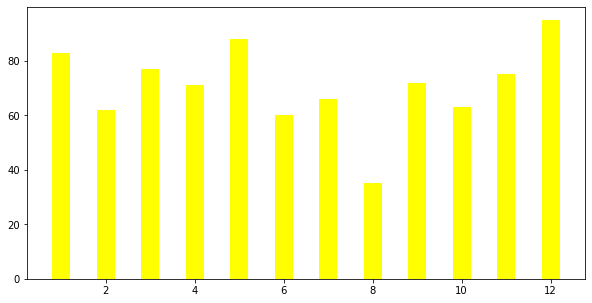

In [4]:
#10 Bar graph showing number of new movies watched by month 
fig_data = normal.groupby(['Logged_Month']).agg({'Name':'size'})
x_axis = list(fig_data.index)
y_axis = list(fig_data['Name'])

fig = plt.figure(figsize = (10, 5))

plt.bar(x_axis,y_axis, color ='yellow',
        width = 0.4)

<BarContainer object of 7 artists>

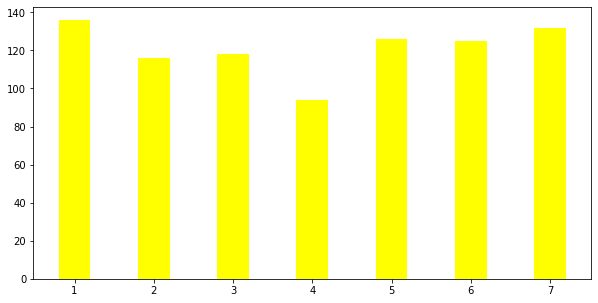

In [5]:
#11 Bar graph showing number of new movies watched by day of the week  
fig_data = normal.groupby(['Logged_DOW']).agg({'Name':'size'})
x_axis = list(fig_data.index)
y_axis = list(fig_data['Name'])

fig = plt.figure(figsize = (10, 5))

plt.bar(x_axis,y_axis, color ='yellow',
        width = 0.4)

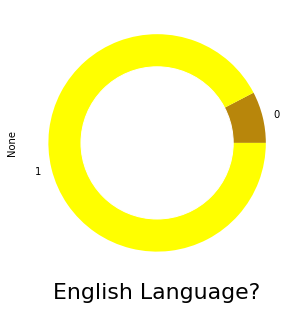

In [6]:
#12 Donut chart for english language
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
df.groupby('english_language').size().plot(kind='pie', colors=['darkgoldenrod','yellow'], ax=ax1)
ax1.set_xlabel('English Language?', size=22)

#Add in white circle to make it a donut
circ=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circ)

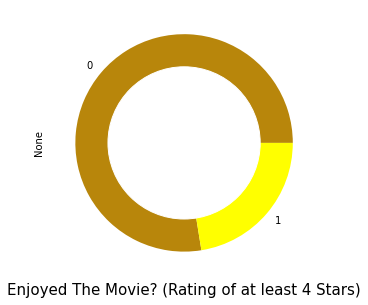

In [7]:
#13 Donut chart for whether rating was 4 stars or more
df['enjoyed'] = np.where(df['Rating']>=4,1,0)
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
df.groupby('enjoyed').size().plot(kind='pie', colors=['darkgoldenrod','yellow'], ax=ax1)
ax1.set_xlabel('Enjoyed The Movie? (Rating of at least 4 Stars)', size=15)

#Add in white circle to make it a donut
circ=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circ)

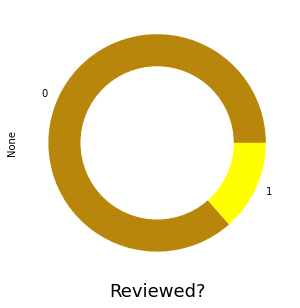

In [8]:
#14 Donut chart for whether a review was written or not
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
df.groupby('Review').size().plot(kind='pie', colors=['darkgoldenrod','yellow'], ax=ax1)
ax1.set_xlabel('Reviewed?', size=18)

#Add in white circle to make it a donut
circ=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circ)

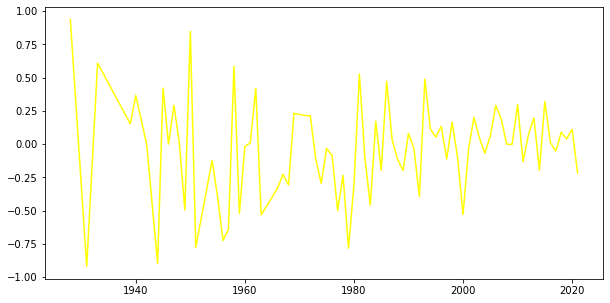

In [9]:
#15 Line graph of average sentiment score of movies by Release year
fig_data = normal.groupby(['Year']).agg({'movie_sentiment':'mean'})
x_axis = list(fig_data.index)
y_axis = list(fig_data['movie_sentiment'])

fig = plt.figure(figsize = (10, 5))

plt.plot(x_axis,y_axis,color='yellow')
plt.show()

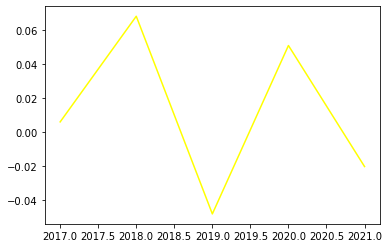

In [10]:
#16 Line graph of average sentiment score of movies by Logged year
fig_data = normal.groupby(['Logged_Year']).agg({'movie_sentiment':'mean'})
x_axis = list(fig_data.index)
y_axis = list(fig_data['movie_sentiment'])

plt.plot(x_axis,y_axis,color='yellow')
plt.show()

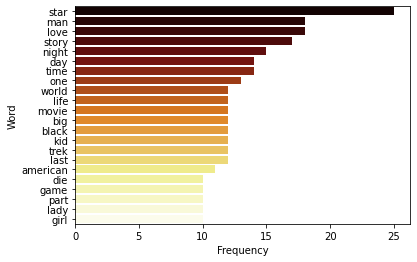

In [11]:
#17 Heatmap of words in titles reimagined as a barplot
titles_fd = titles_fd[titles_fd['Frequency']>=10].sort_values(by=['Frequency'],ascending=False)

sns.barplot(x='Frequency',y='Word',data=titles_fd,palette='afmhot')